## `Stock prediction model using LSTM`.

In [1]:
import yfinance as yf
import datetime as dt

In [2]:
#Importing libraries
#import pandas_datareader as dr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [3]:
#building dataframe for tata motors stock from yahoo finance
df = yf.download('AAPL', dt.datetime(2022,6,17) , dt.datetime(2023,8,17))
df.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-16  132.080002  132.389999  129.039993  130.059998  129.113632   
2022-06-17  130.070007  133.080002  129.809998  131.559998  130.602707   
2022-06-21  133.419998  137.059998  133.320007  135.869995  134.881348   
2022-06-22  134.789993  137.759995  133.910004  135.350006  134.365143   
2022-06-23  136.820007  138.589996  135.630005  138.270004  137.263901   
...                ...         ...         ...         ...         ...   
2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
2023-08-11  177.320007  178.619995  176.550003  177.789993  177.789993   
2023-08-14  177.970001  179.690002  177.309998  179.460007  179.460007   
2023-08-15  178.880005  179.479996  177.050003  177.449997  177.449997   
2023-08-16  177.130005  178.539993  176.500000  176.570007  176.570007   

       

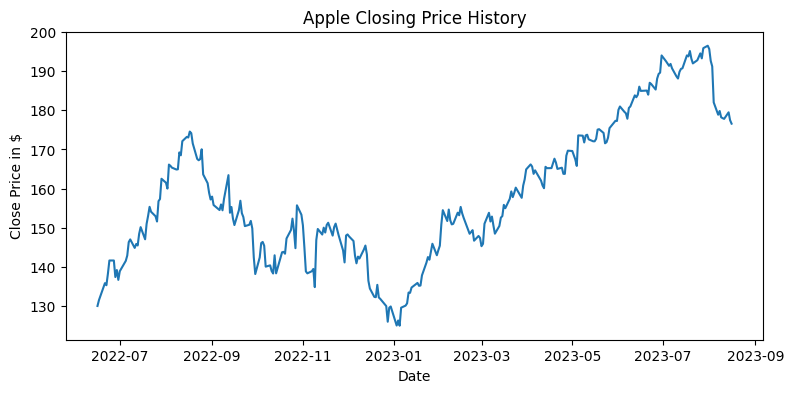

In [4]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Apple Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [5]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])


In [6]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [7]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [8]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [9]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)

In [10]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
#model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
#print(model.summary())

In [11]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=5, epochs=5)

Epoch 1/5
35/35 [==============================] - 6s 29ms/step - loss: 0.0660
Epoch 2/5
35/35 [==============================] - 1s 29ms/step - loss: 0.0149
Epoch 3/5
35/35 [==============================] - 1s 29ms/step - loss: 0.0109
Epoch 4/5
35/35 [==============================] - 1s 29ms/step - loss: 0.0092
Epoch 5/5
35/35 [==============================] - 1s 29ms/step - loss: 0.0089


In [12]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [13]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [14]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

2/2 [==============================] - 1s 12ms/step


In [15]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value 
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 [==============================] - 0s 24ms/step
+1
[[176.76637]]
+2
[[175.5643]]
+3
[[174.50629]]
+4
[[173.55214]]
+5
[[172.67424]]


In [16]:
#Calculating Root Mean Square Error 
rmse=np.sqrt(np.mean(((pred_inverse - y_test)**2)))
rmse 
#Last Best:- 0.9894429065605955

4.682285734989008

In [17]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe

array([0.02566381])

In [18]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

C:\Users\dell\AppData\Local\Temp\ipykernel_4164\3551490693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = pred_inverse


,Close,pred
Date,,
2023-05-23,171.559998,173.080032
2023-05-24,171.839996,173.079315
2023-05-25,172.990005,172.931656
2023-05-26,175.429993,172.772049
2023-05-30,177.300003,172.789536
2023-05-31,177.250000,173.053238
2023-06-01,180.089996,173.453964
2023-06-02,180.949997,174.145187
2023-06-05,179.580002,175.038025


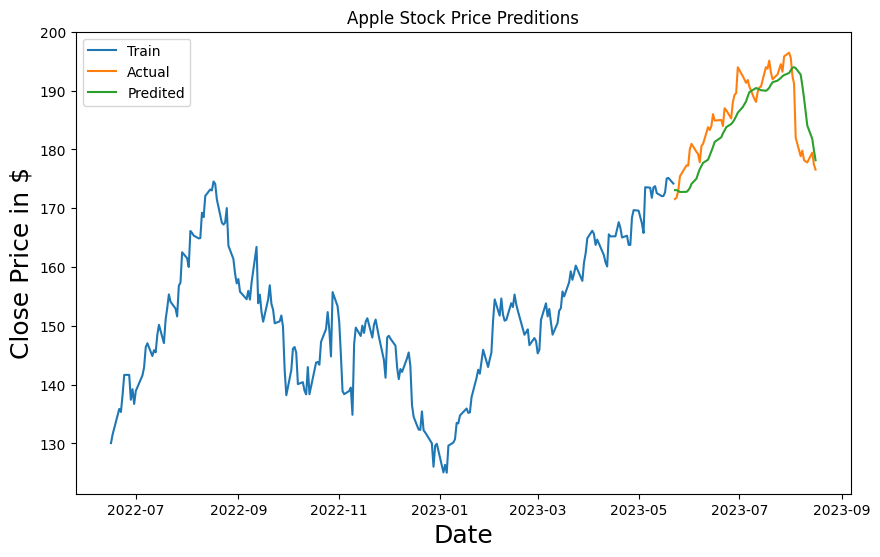

In [19]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(10,6))
plt.title("Apple Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()